In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt

In [2]:
import warnings
def plot_sampled_function(xall, yall, zall, ax=None, nbins=100, nlevels=20, cmap=plt.cm.bwr, cbar=True, cbar_label=None):
    # histogram data
    xmin = np.min(xall)
    xmax = np.max(xall)
    dx = (xmax - xmin) / float(nbins)
    ymin = np.min(yall)
    ymax = np.max(yall)
    dy = (ymax - ymin) / float(nbins)
    # bin data
    eps = x
    xbins = np.linspace(xmin - 0.5*dx, xmax + 0.5*dx, num=nbins)
    ybins = np.linspace(ymin - 0.5*dy, ymax + 0.5*dy, num=nbins)
    xI = np.digitize(xall, xbins)
    yI = np.digitize(yall, ybins)
    # result
    z = np.zeros((nbins, nbins))
    N = np.zeros((nbins, nbins))
    # average over bins
    for t in range(len(xall)):
        z[xI[t], yI[t]] += zall[t]
        N[xI[t], yI[t]] += 1.0

    with warnings.catch_warnings() as cm:
        warnings.simplefilter('ignore')
        z /= N
    # do a contour plot
    extent = [xmin, xmax, ymin, ymax]
    if ax is None:
        ax = plt.gca()
    ax.contourf(z.T, 100, extent=extent, cmap=cmap)
    if cbar:
        cbar = plt.colorbar()
        if cbar_label is not None:
            cbar.ax.set_ylabel(cbar_label)

    return ax

In [3]:
def plot_sampled_density(xall, yall, zall, ax=None, nbins=100, cmap=plt.cm.Blues, cbar=True, cbar_label=None):
    return plot_sampled_function(xall, yall, zall, ax=ax, nbins=nbins, cmap=cmap, cbar=cbar, cbar_label=cbar_label)

In [8]:
from mdshare import fetch

In [9]:
topfile = fetch('pentapeptide-impl-solv.pdb')
traj_list = [fetch('pentapeptide-%02d-500ns-impl-solv.xtc' % i) for i in range(25)]

100%|██████████| 7.50k/7.50k [00:00<00:00, 28.7kB/s]                               
100%|██████████| 2.22M/2.22M [00:00<00:00, 2.69MB/s]                                                 
100%|██████████| 2.22M/2.22M [00:00<00:00, 3.04MB/s]                                                 
100%|██████████| 2.22M/2.22M [00:00<00:00, 3.07MB/s]                                                 
100%|██████████| 2.22M/2.22M [00:00<00:00, 2.72MB/s]                                                 
100%|██████████| 2.22M/2.22M [00:00<00:00, 2.90MB/s]                                                 
100%|██████████| 2.22M/2.22M [00:00<00:00, 3.21MB/s]                                                 
100%|██████████| 2.22M/2.22M [00:00<00:00, 3.27MB/s]                                                 
100%|██████████| 2.22M/2.22M [00:00<00:00, 3.45MB/s]                                                 
100%|██████████| 2.22M/2.22M [00:00<00:00, 2.91MB/s]                                                

In [11]:
feat = coor.featurizer(topfile)
feat.add_backbone_torsions(cossin=True)
feat.add_sidechain_torsions(which=['chi1'], cossin=True)
feat.dimension()

24

In [12]:
inp = coor.source(traj_list, feat)
print('number of trajectories = ',inp.number_of_trajectories())
print('trajectory length = ',inp.trajectory_length(0))
print('trajectory time step = ', 500.0 / (inp.trajectory_length(0)-1),'ns')
print('number of dimension = ',inp.dimension())

100%|██████████| 25/25 [00:00<00:00, 126.68it/s]                     


number of trajectories =  25
trajectory length =  5001
trajectory time step =  0.1 ns
number of dimension =  24


In [13]:
tica_obj = coor.tica(inp, lag=20, var_cutoff=0.9, kinetic_map=True)
print('TICA dimension ', tica_obj.dimension())

100%|██████████| 25/25 [00:01<00:00, 14.19it/s]                       

TICA dimension  4


In [14]:
tica_obj.cumvar

array([0.28247025, 0.55561646, 0.77858738, 0.9168387 , 0.95382315,
       0.97751835, 0.99388363, 0.99866959, 0.99918675, 0.99933181,
       0.99946073, 0.99958342, 0.99969454, 0.99978435, 0.99984132,
       0.99988615, 0.9999211 , 0.9999465 , 0.9999675 , 0.99997994,
       0.99999016, 0.99999839, 0.99999988, 1.        ])

In [15]:
# here we do a little trick to ensure that eigenvectors always have the same sign structure.
# That's irrelevant to the analysis and just nicer plots - you can ignore it.
for i in range(2):
    if tica_obj.eigenvectors[0, i] > 0:
        tica_obj.eigenvectors[:, i] *= -1

In [16]:
Y = tica_obj.get_output() # get tica coordinates
print('number of trajectories = ', np.shape(Y)[0])
print('number of frames = ', np.shape(Y)[1])
print('number of dimensions = ',np.shape(Y)[2])

100%|██████████| 25/25 [00:01<00:00, 15.91it/s]                        

number of trajectories =  25
number of frames =  5001
number of dimensions =  4


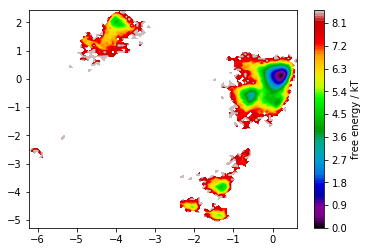

In [17]:
def plot_labels(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.text(-2, -4.7, '1', fontsize=20, color='black')
    ax.text(-1.2, -5, '2', fontsize=20, color='black')
    ax.text(-4.2, 1.5, '3', fontsize=20, color='black')
    ax.text(-0.1, 0, '4', fontsize=20, color='white')
mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1]);

([<matplotlib.axis.YTick at 0x7fd51a4d9c88>,
 <a list of 5 Text yticklabel objects>)

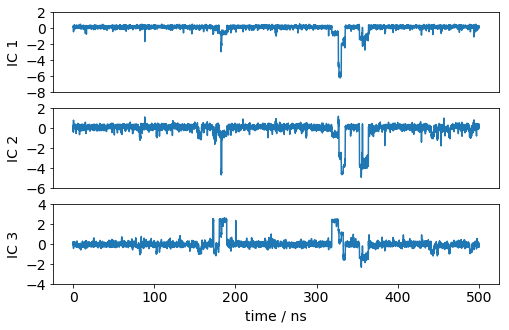

In [18]:
matplotlib.rcParams.update({'font.size': 14})
dt = 0.1
plt.figure(figsize=(8,5))
ax1=plt.subplot(311)
x = dt*np.arange(Y[0].shape[0])
plt.plot(x, Y[0][:,0]); plt.ylabel('IC 1'); plt.xticks([]); plt.yticks(np.arange(-8, 4, 2))
ax1=plt.subplot(312)
plt.plot(x, Y[0][:,1]); plt.ylabel('IC 2'); plt.xticks([]);  plt.yticks(np.arange(-6, 4, 2))
ax1=plt.subplot(313)
plt.plot(x, Y[0][:,2]); plt.xlabel('time / ns'); plt.ylabel('IC 3'); plt.yticks(np.arange(-4, 6, 2))

In [19]:
n_clusters = 250      # number of k-means clusters
clustering = coor.cluster_kmeans(Y,k=n_clusters)

kmeans iterations: 100%|██████████| 10/10 [00:40<00:00,  1.81s/it]

24-01-19 17:08:45 pyemma.coordinates.clustering.kmeans.KmeansClustering[3] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


100%|██████████| 10/10 [00:40<00:00,  1.81s/it]                   


100%|██████████| 25/25 [00:00<00:00, 88.55it/s]                                    


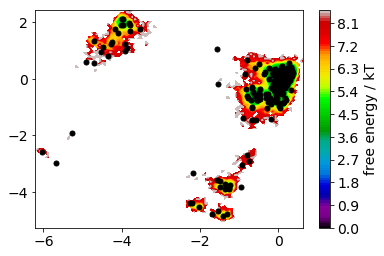

In [20]:
dtrajs = clustering.dtrajs

mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1])
cc_x = clustering.clustercenters[:,0]
cc_y = clustering.clustercenters[:,1]
plt.plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')

100%|██████████| 13/13 [00:00<00:00, 17.63it/s]                                 


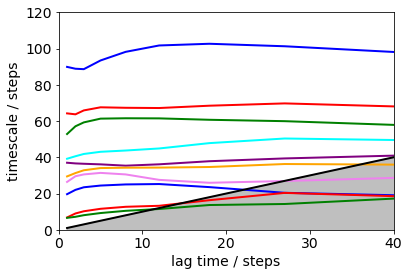

In [21]:
its = msm.timescales_msm(dtrajs, lags=200, nits=10)
matplotlib.rcParams.update({'font.size': 14})
mplt.plot_implied_timescales(its, ylog=False, units='steps', linewidth=2)
plt.xlim(0, 40); plt.ylim(0, 120);

100%|██████████| 12/12 [02:58<00:00, 16.64s/it]                        


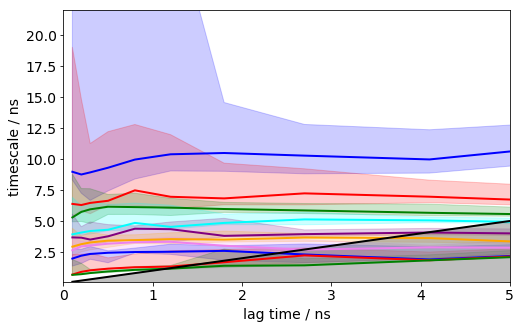

In [22]:
its = msm.timescales_msm(dtrajs, lags=100, nits=10, errors='bayes', n_jobs=-1)
plt.figure(figsize=(8,5))
matplotlib.rcParams.update({'font.size': 14})
mplt.plot_implied_timescales(its, show_mean=False, ylog=False, dt=0.1, units='ns', linewidth=2)
plt.xlim(0, 5); plt.ylim(0.1,22);